<a href="https://colab.research.google.com/github/aksoumya99/Stock_Predictor/blob/master/stock_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STOCK PRICE PREDICTOR**

Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [0]:
dataset = pd.read_csv('AAPL_data.csv',index_col="date",parse_dates=True)
dataset = dataset.drop(['Name'],1)

In [0]:
dataset.head()

,open,high,low,close,volume
date,,,,,
2013-08-02,67.7142,68.4014,66.8928,67.8542,158168416
2013-11-02,68.0714,69.2771,67.6071,68.5614,129029425
2013-12-02,68.5014,68.9114,66.8205,66.8428,151829363
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154


In [0]:
dataset.isna().any()

open      False
high      False
low       False
close     False
volume    False
dtype: bool

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-08-02 to 2018-07-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1259 non-null   float64
 1   high    1259 non-null   float64
 2   low     1259 non-null   float64
 3   close   1259 non-null   float64
 4   volume  1259 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [0]:
dataset["volume"] = dataset["volume"].astype(float)

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-08-02 to 2018-07-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1259 non-null   float64
 1   high    1259 non-null   float64
 2   low     1259 non-null   float64
 3   close   1259 non-null   float64
 4   volume  1259 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


In [0]:
print(dataset)

                open      high       low     close       volume
date                                                           
2013-08-02   67.7142   68.4014   66.8928   67.8542  158168416.0
2013-11-02   68.0714   69.2771   67.6071   68.5614  129029425.0
2013-12-02   68.5014   68.9114   66.8205   66.8428  151829363.0
2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995.0
2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154.0
...              ...       ...       ...       ...          ...
2018-01-02  167.1650  168.6200  166.7600  167.7800   47230787.0
2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825.0
2018-05-02  159.1000  163.8800  156.0000  156.4900   72738522.0
2018-06-02  154.8300  163.7200  154.0000  163.0300   68243838.0
2018-07-02  163.0850  163.4000  159.0685  159.5400   51608580.0

[1259 rows x 5 columns]


In [0]:
dataset['open_1']=dataset[['open']].shift(1)
dataset['open_2']=dataset[['open']].shift(2)
dataset['high_1']=dataset[['high']].shift(1)
dataset['high_2']=dataset[['high']].shift(2)
dataset['low_1']=dataset[['low']].shift(1)
dataset['low_2']=dataset[['low']].shift(2)
dataset['close_1']=dataset[['close']].shift(1)
dataset['close_2']=dataset[['close']].shift(2)
dataset['volume_1']=dataset[['volume']].shift(1)
dataset['volume_2']=dataset[['volume']].shift(2)

In [0]:
print(dataset)

                open      high       low  ...   close_2     volume_1     volume_2
date                                      ...                                    
2013-08-02   67.7142   68.4014   66.8928  ...       NaN          NaN          NaN
2013-11-02   68.0714   69.2771   67.6071  ...       NaN  158168416.0          NaN
2013-12-02   68.5014   68.9114   66.8205  ...   67.8542  129029425.0  158168416.0
2013-02-13   66.7442   67.6628   66.1742  ...   68.5614  151829363.0  129029425.0
2013-02-14   66.3599   67.3771   66.2885  ...   66.8428  118721995.0  151829363.0
...              ...       ...       ...  ...       ...          ...          ...
2018-01-02  167.1650  168.6200  166.7600  ...  166.9700   32478930.0   46048185.0
2018-02-02  166.0000  166.8000  160.1000  ...  167.4300   47230787.0   32478930.0
2018-05-02  159.1000  163.8800  156.0000  ...  167.7800   86593825.0   47230787.0
2018-06-02  154.8300  163.7200  154.0000  ...  160.5000   72738522.0   86593825.0
2018-07-02  163.

In [0]:
column_names = ["open", "high", "low", "volume", "open_1", "open_2", "high_1", "high_2", "low_1", "low_2", "close_1", "close_2", "volume_1", "volume_2", "close"]
dataset = dataset.reindex(columns=column_names)

In [0]:
del dataset['open']
del dataset['high']
del dataset['low']
del dataset['volume']

In [0]:
print(dataset)

              open_1    open_2    high_1  ...     volume_1     volume_2     close
date                                      ...                                    
2013-08-02       NaN       NaN       NaN  ...          NaN          NaN   67.8542
2013-11-02   67.7142       NaN   68.4014  ...  158168416.0          NaN   68.5614
2013-12-02   68.0714   67.7142   69.2771  ...  129029425.0  158168416.0   66.8428
2013-02-13   68.5014   68.0714   68.9114  ...  151829363.0  129029425.0   66.7156
2013-02-14   66.7442   68.5014   67.6628  ...  118721995.0  151829363.0   66.6556
...              ...       ...       ...  ...          ...          ...       ...
2018-01-02  166.8700  165.5250  168.4417  ...   32478930.0   46048185.0  167.7800
2018-02-02  167.1650  166.8700  168.6200  ...   47230787.0   32478930.0  160.5000
2018-05-02  166.0000  167.1650  166.8000  ...   86593825.0   47230787.0  156.4900
2018-06-02  159.1000  166.0000  163.8800  ...   72738522.0   86593825.0  163.0300
2018-07-02  154.

In [0]:
X_train = dataset.iloc[2:1200, :-1].values
y_train = dataset.iloc[2:1200:, -1].values
X_test = dataset.iloc[1200:, :-1].values
y_test = dataset.iloc[1200:, -1].values

In [0]:
#print(X)

In [0]:
#print(y)

In [0]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
print(X_train)

[[6.80714000e+01 6.77142000e+01 6.92771000e+01 ... 6.78542000e+01
  1.29029425e+08 1.58168416e+08]
 [6.85014000e+01 6.80714000e+01 6.89114000e+01 ... 6.85614000e+01
  1.51829363e+08 1.29029425e+08]
 [6.67442000e+01 6.85014000e+01 6.76628000e+01 ... 6.68428000e+01
  1.18721995e+08 1.51829363e+08]
 ...
 [1.73910000e+02 1.72365000e+02 1.75250000e+02 ... 1.74250000e+02
  2.43614850e+07 3.50263060e+07]
 [1.74660000e+02 1.73910000e+02 1.76240000e+02 ... 1.74810000e+02
  2.44095270e+07 2.43614850e+07]
 [1.75110000e+02 1.74660000e+02 1.76095000e+02 ... 1.76240000e+02
  2.91856680e+07 2.44095270e+07]]


In [0]:
print(y_train)

[ 66.8428  66.7156  66.6556 ... 176.24   175.88   174.67  ]


In [0]:
print(X_test)

[[1.7511000e+02 1.7511000e+02 1.7538000e+02 1.7609500e+02 1.7427000e+02
  1.7314000e+02 1.7467000e+02 1.7588000e+02 2.5145500e+07 2.9185668e+07]
 [1.7350000e+02 1.7511000e+02 1.7450000e+02 1.7538000e+02 1.7340000e+02
  1.7427000e+02 1.7397000e+02 1.7467000e+02 1.6982080e+07 2.5145500e+07]
 [1.7304000e+02 1.7350000e+02 1.7348000e+02 1.7450000e+02 1.7118000e+02
  1.7340000e+02 1.7134000e+02 1.7397000e+02 2.4782487e+07 1.6982080e+07]
 [1.6997000e+02 1.7304000e+02 1.7031970e+02 1.7348000e+02 1.6838000e+02
  1.7118000e+02 1.6908000e+02 1.7134000e+02 2.9158070e+07 2.4782487e+07]
 [1.7118000e+02 1.6997000e+02 1.7187000e+02 1.7031970e+02 1.7030000e+02
  1.6838000e+02 1.7110000e+02 1.6908000e+02 2.3637484e+07 2.9158070e+07]
 [1.7104000e+02 1.7118000e+02 1.7139000e+02 1.7187000e+02 1.6964000e+02
  1.7030000e+02 1.7015000e+02 1.7110000e+02 2.1899544e+07 2.3637484e+07]
 [1.7029000e+02 1.7104000e+02 1.7056000e+02 1.7139000e+02 1.6956000e+02
  1.6964000e+02 1.6998000e+02 1.7015000e+02 1.6262447e+07 

In [0]:
print(y_test)

[173.97 171.34 169.08 171.1  170.15 169.98 173.14 174.96 174.97 174.09
 173.07 169.48 171.85 171.05 169.8  169.64 169.01 169.32 169.37 172.67
 171.7  172.27 172.22 173.97 176.42 174.54 174.35 175.01 175.01 170.57
 170.6  171.08 169.23 172.26 172.23 173.03 175.   174.35 174.33 174.29
 175.28 177.09 176.19 179.1  179.26 178.46 177.   177.04 174.22 171.11
 171.51 167.96 166.97 167.43 167.78 160.5  156.49 163.03 159.54]


In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regressor.predict(X_test)
a=np.array(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print(a)

[[174.75762325 173.97      ]
 [173.9413347  171.34      ]
 [171.37096918 169.08      ]
 [169.01599647 171.1       ]
 [171.39863173 170.15      ]
 [170.1875832  169.98      ]
 [170.05726228 173.14      ]
 [173.26955991 174.96      ]
 [175.00554642 174.97      ]
 [175.08076779 174.09      ]
 [173.95140971 173.07      ]
 [173.04503024 169.48      ]
 [169.19420106 171.85      ]
 [171.93321389 171.05      ]
 [170.80587252 169.8       ]
 [170.20734431 169.64      ]
 [170.01760815 169.01      ]
 [168.90634124 169.32      ]
 [169.80217524 169.37      ]
 [169.55824315 172.67      ]
 [172.56546436 171.7       ]
 [171.9091624  172.27      ]
 [172.56201299 172.22      ]
 [172.32737493 173.97      ]
 [173.94258505 176.42      ]
 [176.67979393 174.54      ]
 [174.48963283 174.35      ]
 [174.28319299 175.01      ]
 [175.29971953 175.01      ]
 [175.09981366 170.57      ]
 [170.06861851 170.6       ]
 [170.54708358 171.08      ]
 [171.18328459 169.23      ]
 [169.28503803 172.26      ]
 [172.08879023

In [0]:
column_names = ['predicted', 'actual']
df = pd.DataFrame(a, columns=column_names)
print(df)

     predicted  actual
0   174.757623  173.97
1   173.941335  171.34
2   171.370969  169.08
3   169.015996  171.10
4   171.398632  170.15
5   170.187583  169.98
6   170.057262  173.14
7   173.269560  174.96
8   175.005546  174.97
9   175.080768  174.09
10  173.951410  173.07
11  173.045030  169.48
12  169.194201  171.85
13  171.933214  171.05
14  170.805873  169.80
15  170.207344  169.64
16  170.017608  169.01
17  168.906341  169.32
18  169.802175  169.37
19  169.558243  172.67
20  172.565464  171.70
21  171.909162  172.27
22  172.562013  172.22
23  172.327375  173.97
24  173.942585  176.42
25  176.679794  174.54
26  174.489633  174.35
27  174.283193  175.01
28  175.299720  175.01
29  175.099814  170.57
30  170.068619  170.60
31  170.547084  171.08
32  171.183285  169.23
33  169.285038  172.26
34  172.088790  172.23
35  172.865925  173.03
36  173.178685  175.00
37  174.999452  174.35
38  174.588727  174.33
39  174.319296  174.29
40  174.156056  175.28
41  175.333308  177.09
42  177.087

Text(0, 0.5, 'Closing prices')

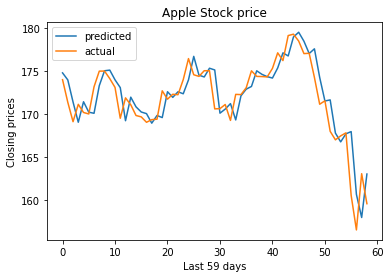

In [0]:
ax = df.plot(title = 'Apple Stock price')
ax.set_xlabel("Last 59 days")
ax.set_ylabel("Closing prices")

In [0]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7522469930354231

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

4.708833350635131

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
poly_reg_2 = PolynomialFeatures(degree = 2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg_2.fit_transform(X_test)
regressor_2 = LinearRegression()
regressor_2.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(X_train_poly)

[[1.00000000e+00 6.80714000e+01 6.77142000e+01 ... 1.66485925e+16
  2.04083798e+16 2.50172478e+16]
 [1.00000000e+00 6.85014000e+01 6.80714000e+01 ... 2.30521555e+16
  1.95904554e+16 1.66485925e+16]
 [1.00000000e+00 6.67442000e+01 6.85014000e+01 ... 1.40949121e+16
  1.80254849e+16 2.30521555e+16]
 ...
 [1.00000000e+00 1.73910000e+02 1.72365000e+02 ... 5.93481951e+14
  8.53292828e+14 1.22684211e+15]
 [1.00000000e+00 1.74660000e+02 1.73910000e+02 ... 5.95825008e+14
  5.94652326e+14 5.93481951e+14]
 [1.00000000e+00 1.75110000e+02 1.74660000e+02 ... 8.51803217e+14
  7.12408351e+14 5.95825008e+14]]


In [0]:
print(X_test_poly)

[[1.00000000e+00 1.75110000e+02 1.75110000e+02 ... 6.32296170e+14
  7.33888215e+14 8.51803217e+14]
 [1.00000000e+00 1.73500000e+02 1.75110000e+02 ... 2.88391041e+14
  4.27022893e+14 6.32296170e+14]
 [1.00000000e+00 1.73040000e+02 1.73500000e+02 ... 6.14171662e+14
  4.20858177e+14 2.88391041e+14]
 ...
 [1.00000000e+00 1.66000000e+02 1.67165000e+02 ... 7.49849053e+15
  4.08989450e+15 2.23074724e+15]
 [1.00000000e+00 1.59100000e+02 1.66000000e+02 ... 5.29089258e+15
  6.29870684e+15 7.49849053e+15]
 [1.00000000e+00 1.54830000e+02 1.59100000e+02 ... 4.65722142e+15
  4.96395591e+15 5.29089258e+15]]


In [0]:
y_pred_2 = regressor_2.predict(X_test_poly)
a2=np.array(np.concatenate((y_pred_2.reshape(len(y_pred_2),1), y_test.reshape(len(y_test),1)),1))
print(a2)

[[179.79114546 173.97      ]
 [174.94474658 171.34      ]
 [170.44908838 169.08      ]
 [166.67898079 171.1       ]
 [175.17825787 170.15      ]
 [171.07966937 169.98      ]
 [171.485269   173.14      ]
 [177.77790179 174.96      ]
 [174.82220791 174.97      ]
 [175.31307843 174.09      ]
 [173.72930657 173.07      ]
 [176.97364105 169.48      ]
 [177.6432414  171.85      ]
 [178.48094752 171.05      ]
 [172.73614807 169.8       ]
 [172.80724055 169.64      ]
 [170.08770725 169.01      ]
 [163.80449156 169.32      ]
 [170.96654686 169.37      ]
 [167.65089183 172.67      ]
 [178.96193039 171.7       ]
 [164.85384461 172.27      ]
 [173.87848632 172.22      ]
 [170.8704851  173.97      ]
 [174.96861181 176.42      ]
 [178.91244998 174.54      ]
 [171.53073402 174.35      ]
 [174.59675053 175.01      ]
 [178.61368835 175.01      ]
 [172.74501969 170.57      ]
 [173.56358405 170.6       ]
 [170.23109904 171.08      ]
 [173.53236172 169.23      ]
 [168.06630449 172.26      ]
 [171.76619801

In [0]:
column_names = ['predicted', 'actual']
df2 = pd.DataFrame(a2, columns=column_names)
print(df2)

     predicted  actual
0   179.791145  173.97
1   174.944747  171.34
2   170.449088  169.08
3   166.678981  171.10
4   175.178258  170.15
5   171.079669  169.98
6   171.485269  173.14
7   177.777902  174.96
8   174.822208  174.97
9   175.313078  174.09
10  173.729307  173.07
11  176.973641  169.48
12  177.643241  171.85
13  178.480948  171.05
14  172.736148  169.80
15  172.807241  169.64
16  170.087707  169.01
17  163.804492  169.32
18  170.966547  169.37
19  167.650892  172.67
20  178.961930  171.70
21  164.853845  172.27
22  173.878486  172.22
23  170.870485  173.97
24  174.968612  176.42
25  178.912450  174.54
26  171.530734  174.35
27  174.596751  175.01
28  178.613688  175.01
29  172.745020  170.57
30  173.563584  170.60
31  170.231099  171.08
32  173.532362  169.23
33  168.066304  172.26
34  171.766198  172.23
35  181.919743  173.03
36  169.152441  175.00
37  176.968273  174.35
38  175.760077  174.33
39  171.245867  174.29
40  176.735497  175.28
41  177.126343  177.09
42  179.189

Text(0, 0.5, 'Closing prices')

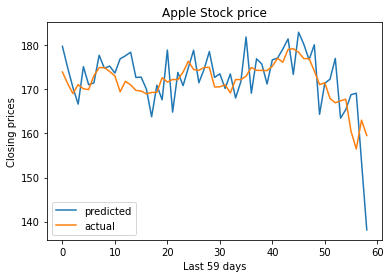

In [0]:
ax = df2.plot(title = 'Apple Stock price')
ax.set_xlabel("Last 59 days")
ax.set_ylabel("Closing prices")

In [0]:
r2_score(y_test, y_pred_2)

-0.5690242451493592

In [0]:
mean_squared_error(y_test, y_pred_2)

29.821126225809124

In [0]:
poly_reg_3 = PolynomialFeatures(degree = 3)
poly_reg_4 = PolynomialFeatures(degree = 3)
X_train_poly_2 = poly_reg_3.fit_transform(X_train)
X_test_poly_2 = poly_reg_4.fit_transform(X_test)
regressor_3 = LinearRegression()
regressor_3.fit(X_train_poly_2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(X_train_poly_2)

[[1.00000000e+00 6.80714000e+01 6.77142000e+01 ... 2.63328151e+24
  3.22796110e+24 3.95693846e+24]
 [1.00000000e+00 6.85014000e+01 6.80714000e+01 ... 2.97440637e+24
  2.52774520e+24 2.14815832e+24]
 [1.00000000e+00 6.67442000e+01 6.85014000e+01 ... 2.14002153e+24
  2.73679789e+24 3.49999408e+24]
 ...
 [1.00000000e+00 1.73910000e+02 1.72365000e+02 ... 2.07874804e+22
  2.98876957e+22 4.29717472e+22]
 [1.00000000e+00 1.74660000e+02 1.73910000e+02 ... 1.45151820e+22
  1.44866137e+22 1.44581017e+22]
 [1.00000000e+00 1.75110000e+02 1.74660000e+02 ... 2.07921136e+22
  1.73895509e+22 1.45438066e+22]]


In [0]:
print(X_test_poly_2)

[[1.00000000e+00 1.75110000e+02 1.75110000e+02 ... 1.84539861e+22
  2.14190178e+22 2.48604459e+22]
 [1.00000000e+00 1.73500000e+02 1.75110000e+02 ... 7.25173692e+21
  1.07377041e+22 1.58994033e+22]
 [1.00000000e+00 1.73040000e+02 1.73500000e+02 ... 1.04299123e+22
  7.14704723e+21 4.89747973e+21]
 ...
 [1.00000000e+00 1.66000000e+02 1.67165000e+02 ... 3.54159609e+23
  1.93168936e+23 1.05359948e+23]
 [1.00000000e+00 1.59100000e+02 1.66000000e+02 ... 4.58158626e+23
  5.45429118e+23 6.49322977e+23]
 [1.00000000e+00 1.54830000e+02 1.59100000e+02 ... 3.38759403e+23
  3.61070816e+23 3.84851707e+23]]


In [0]:
y_pred_3 = regressor_3.predict(X_test_poly_2)
a3=np.array(np.concatenate((y_pred_3.reshape(len(y_pred_3),1), y_test.reshape(len(y_test),1)),1))
print(a3)

[[139.00455376 173.97      ]
 [136.89042246 171.34      ]
 [128.1837613  169.08      ]
 [134.34953133 171.1       ]
 [147.03451279 170.15      ]
 [134.9295381  169.98      ]
 [139.05452293 173.14      ]
 [128.34335817 174.96      ]
 [145.35030103 174.97      ]
 [156.62364473 174.09      ]
 [127.8320837  173.07      ]
 [128.80100191 169.48      ]
 [110.14840123 171.85      ]
 [138.49007328 171.05      ]
 [116.88570772 169.8       ]
 [142.48986403 169.64      ]
 [138.67481108 169.01      ]
 [139.40013589 169.32      ]
 [149.69884378 169.37      ]
 [141.50992932 172.67      ]
 [122.07585706 171.7       ]
 [201.12433016 172.27      ]
 [132.4481838  172.22      ]
 [141.68307095 173.97      ]
 [108.93154283 176.42      ]
 [151.84359764 174.54      ]
 [148.70152296 174.35      ]
 [138.17106798 175.01      ]
 [137.22764537 175.01      ]
 [144.60373657 170.57      ]
 [121.81658221 170.6       ]
 [154.30605275 171.08      ]
 [135.37436767 169.23      ]
 [130.70973178 172.26      ]
 [134.00020919

In [0]:
column_names = ['predicted', 'actual']
df3 = pd.DataFrame(a3, columns=column_names)
print(df3)

     predicted  actual
0   139.004554  173.97
1   136.890422  171.34
2   128.183761  169.08
3   134.349531  171.10
4   147.034513  170.15
5   134.929538  169.98
6   139.054523  173.14
7   128.343358  174.96
8   145.350301  174.97
9   156.623645  174.09
10  127.832084  173.07
11  128.801002  169.48
12  110.148401  171.85
13  138.490073  171.05
14  116.885708  169.80
15  142.489864  169.64
16  138.674811  169.01
17  139.400136  169.32
18  149.698844  169.37
19  141.509929  172.67
20  122.075857  171.70
21  201.124330  172.27
22  132.448184  172.22
23  141.683071  173.97
24  108.931543  176.42
25  151.843598  174.54
26  148.701523  174.35
27  138.171068  175.01
28  137.227645  175.01
29  144.603737  170.57
30  121.816582  170.60
31  154.306053  171.08
32  135.374368  169.23
33  130.709732  172.26
34  134.000209  172.23
35  142.013360  173.03
36  162.588884  175.00
37  133.988389  174.35
38  140.313658  174.33
39  137.938590  174.29
40  134.651713  175.28
41  142.220554  177.09
42  130.459

Text(0, 0.5, 'Closing prices')

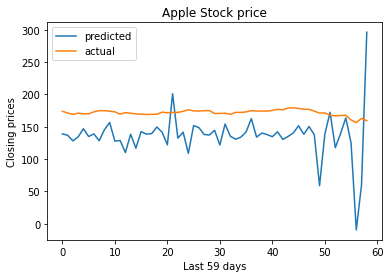

In [0]:
ax = df3.plot(title = 'Apple Stock price')
ax.set_xlabel("Last 59 days")
ax.set_ylabel("Closing prices")

In [0]:
r2_score(y_test, y_pred_3)

-125.6223547300071

In [0]:
mean_squared_error(y_test, y_pred_3)

2406.604764130507

As we can see by the increasing mean squared error and decreasing r2 score, increasing the degree of parameters leads to a worse prediction due to overfitting. The original multiple linear regression performs better than both the polynomial regression models of degree 2 and 3 respectively.